In [1]:
# Análise de Dados Aplicada à Produção Vegetal
# Rodolfo Souza - rodolfomssouza@gmail.com
# Aula 5 - Modelos não-lineares

In [2]:
# Diretório de trabalho ---------------------------------------------------
setwd('~/')
setwd('Programming/R/Curso_R_PGPV/')

In [3]:
# Pacotes para modelos não-lineares
library('hydroGOF')
library('plotrix')

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



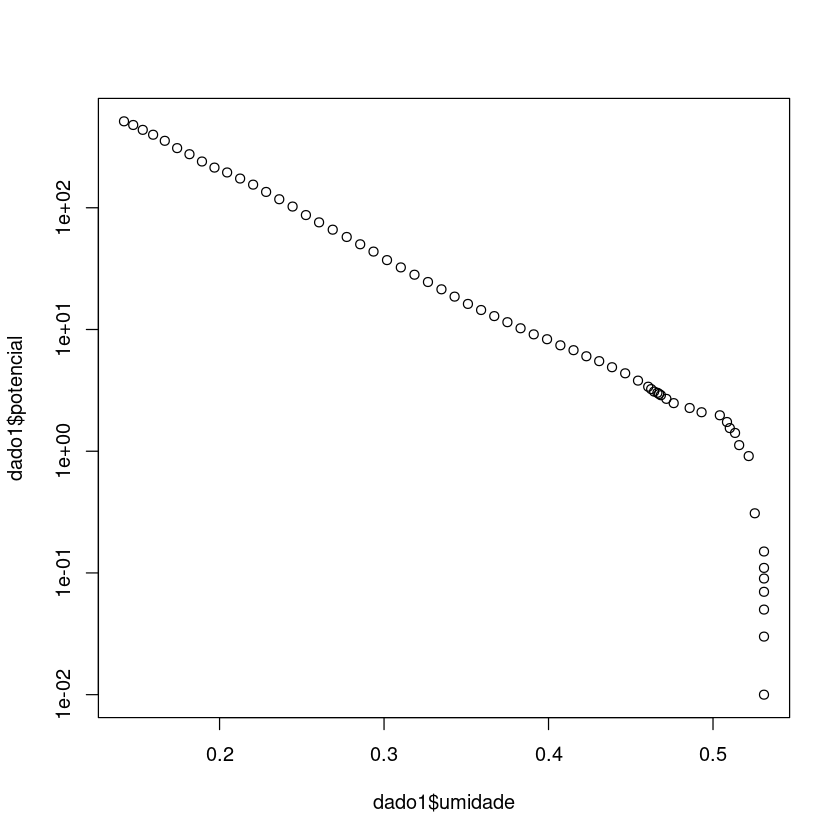

In [4]:
# Exemplo 1. Curva de retenção
# Dados modelos não-lineares
dado1 = read.table('Curva_retencao.txt', h=T)

# Gráfico
plot(dado1$umidade, dado1$potencial, log='y')

In [5]:
# Criando funções
thetaB = function(h, thetaS, hg, n){
    # Condição de Burdine (1953)
    return(thetaS*(1+(h/hg)^n)^-(1-2/n))
}

thetaM = function(h, thetaS, hg, n){
    # Condição de Mualem (1976)
    return(thetaS*(1+(h/hg)^n)^-(1-1/n))
}

In [6]:
# Extraindo os dados
x = dado1$potencial
y = dado1$umidade

In [7]:
# Ajustando os modelos
fit1 = nls(y~thetaB(x,thetaS,hg,n),
           start=list(thetaS=0.53, hg=2, n=2.5))


fit2 = nls(y~thetaM(x,thetaS,hg,n),
           start=list(thetaS=0.53, hg=2, n=2.5))

In [8]:
# Resumo dos ajustes
summary(fit1)
summary(fit2)


Formula: y ~ thetaB(x, thetaS, hg, n)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
thetaS 0.527555   0.002698  195.53   <2e-16 ***
hg     2.205929   0.113476   19.44   <2e-16 ***
n      2.210419   0.003261  677.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008834 on 62 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 7.313e-06



Formula: y ~ thetaM(x, thetaS, hg, n)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
thetaS  0.53428    0.00226  236.45   <2e-16 ***
hg      3.14700    0.15879   19.82   <2e-16 ***
n       1.23600    0.00353  350.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007072 on 62 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.721e-06


In [10]:
# Coeficientes
cf1 = coef(fit1); cf1
cf2 = coef(fit2); cf2

thetaS        hg         n 
0.5275549 2.2059289 2.2104186

thetaS        hg         n 
0.5342831 3.1470015 1.2360039

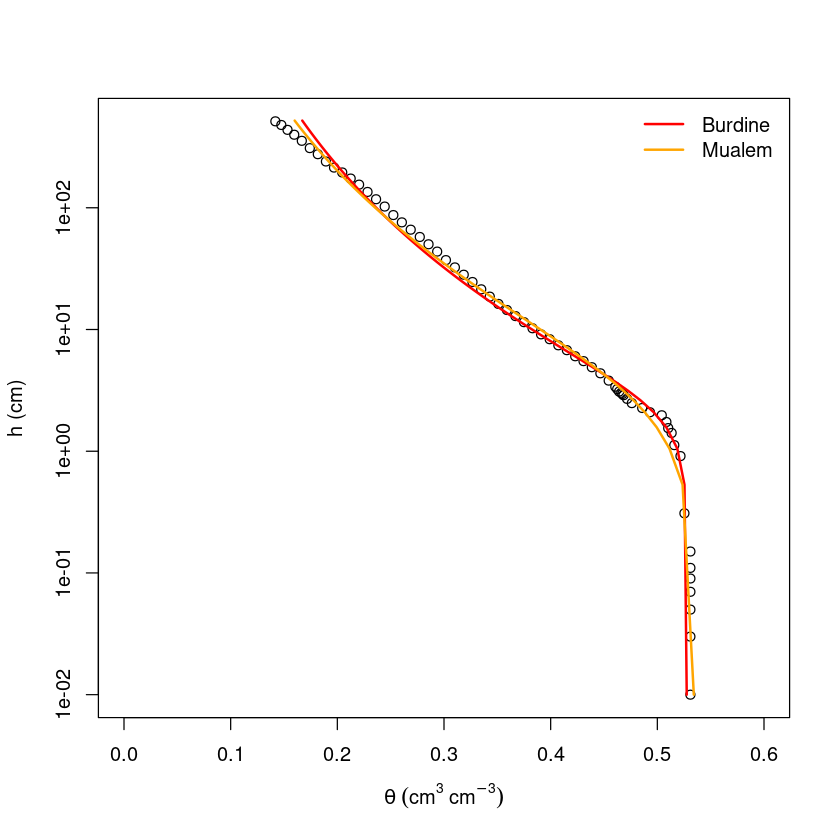

In [13]:
# Gráfico com ajustes
plot(dado1$umidade, dado1$potencial, log='y',
     xlab=expression(theta~(cm^3~cm^{-3})),
     ylab = 'h (cm)', xlim=c(0, 0.6))

# Valores estimados pelos modelos com os parâmetros ajustados
hteorico = seq(0.01, 520, length=1000)
theta1 = thetaB(hteorico, thetaS=cf1[1], hg=cf1[2], n=cf1[3])
theta2 = thetaM(hteorico, thetaS=cf2[1], hg=cf2[2], n=cf2[3])

# Adionar linhas no gráfico
lines(theta1, hteorico, lwd=2, col='red')
lines(theta2, hteorico, lwd=2, col='orange')

# Legeda
legend('topright', legend = c('Burdine', 'Mualem'),
       lwd=2, col=c('red', 'orange'), bty='n')

In [14]:
# Qualidade do ajuste
qa1 = gof(sim = predict(fit1), obs = dado1$umidade)
qa2 = gof(sim = predict(fit2), obs = dado1$umidade)

In [15]:
qas = cbind(qa1, qa2)
colnames(qas) = c('Burdine', 'Mualem')
qas

Burdine Mualem
ME       0.00    0.00 
MAE      0.01    0.01 
MSE      0.00    0.00 
RMSE     0.01    0.01 
NRMSE %  6.80    5.40 
PBIAS %  0.10    0.00 
RSR      0.07    0.05 
rSD      0.99    1.00 
NSE      1.00    1.00 
mNSE     0.94    0.95 
rNSE     0.98    0.99 
d        1.00    1.00 
md       0.97    0.97 
rd       1.00    1.00 
cp      -0.61   -0.03 
r        1.00    1.00 
R2       1.00    1.00 
bR2      0.99    1.00 
KGE      0.99    1.00 
VE       0.98    0.98

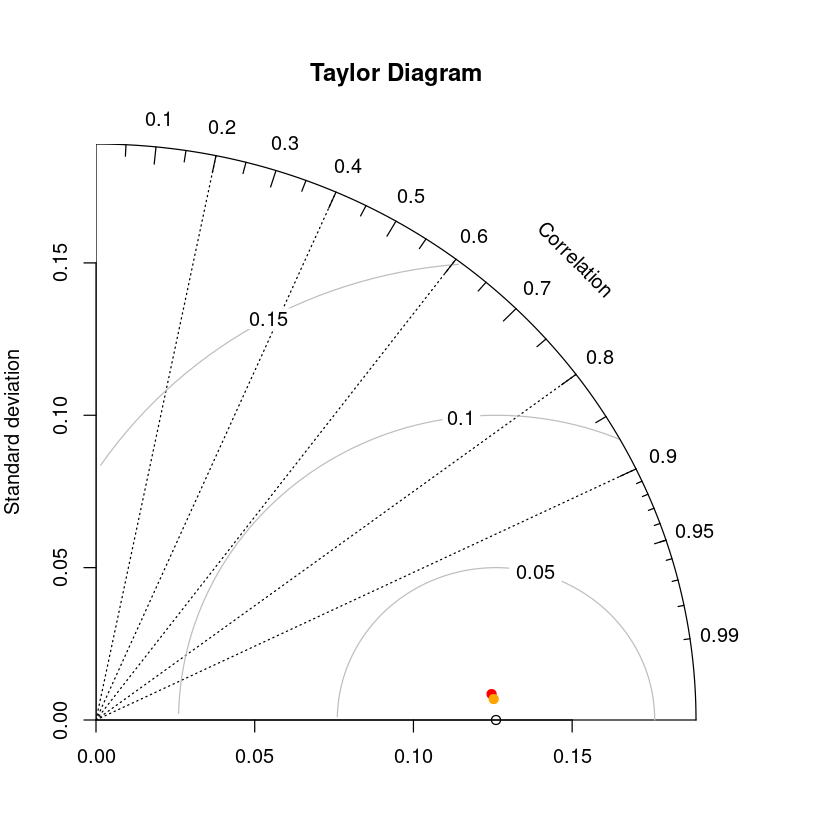

In [16]:
# Diagrama de Taylor
taylor.diagram(dado1$umidade, predict(fit1))
taylor.diagram(dado1$umidade, predict(fit2), add=T, col='orange')